<a href="https://colab.research.google.com/github/AndrewCrossman/Research/blob/main/Find_CompProfile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Packages

In [ ]:
import csv
import numpy as np
import pandas as pd
import scipy as sp
from scipy import optimize
from google.colab import files
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Helper Functions and Values

In [ ]:
################################################################################
# If code returns an error you may need to make this number smaller
################################################################################
numbin = 13

## Extract Data and Name Variables

In [ ]:
file = "https://raw.githubusercontent.com/AndrewCrossman/Research/main/Tests/RMC_Coreshell5050_PtAu_on_Au_1-10-10/1-10.stru"
plotTitle = r'Unrelaxed PtAu'
plotsavename = 'RMC_PtAu_CP.png'
csvsavename = 'RMC_PtAu_CP.csv'

In [ ]:
data = pd.read_csv(file, skiprows=3)
data = data.drop(data.columns[3:], axis=1)
data[["atoms", "x"]] = data[data.columns[0]].str.split(expand=True)
data = data.drop(data.columns[0], axis=1)
data = data.set_axis(["y", "z", "atom", "x"], axis=1, inplace=False)
data["x"] = data["x"].astype(float)
data["y"] = data["y"].astype(float)
data["z"] = data["z"].astype(float)
data["distance"] = np.sqrt((data["x"]*data["x"] + data["y"]*data["y"] + data["z"]*data["z"])*(4.0789*4.0789))

print("Max distance in angstroms "+str(data["distance"].max()))
print("Min distance in angstroms "+str(data["distance"].min()))
################################################################################
# Bin Data between 0 and max distance in "numbin" divisions
################################################################################
# Make bins sizes based off of maximum radius
# realBins = np.linspace(0,data["distance"].max()+.01,numbin)
# Make bins sizes based off of custom max radius
realBins = np.linspace(0,26,numbin)
realBins_truncated = np.around(realBins, decimals=2)
data["bin"] = pd.cut(data["distance"], bins=realBins, right=False, precision=2,include_lowest='True',labels=realBins_truncated[1:])
################################################################################
# Group atom type by bin
data2 = data.groupby("bin")["atom"].value_counts(normalize=True).unstack()
data2 = data2.fillna(0)

Max distance in angstroms 26.6452689760754
Min distance in angstroms 0.13836641206785927


## Make Composition Profile Plot

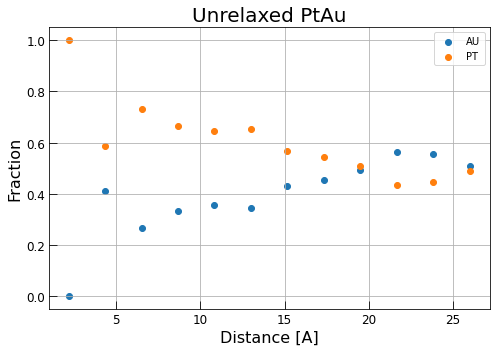

In [ ]:
################################################################################
# Plot Data
################################################################################
fig, ax = plt.subplots(figsize=(7,5))
for key in data2.keys():
    data3 = data2[key].reset_index()
    ax.scatter(realBins_truncated[1:],data3[key], label = key)
################################################################################
# Plot settings
################################################################################
ax.set_title(plotTitle, fontsize=20)
ax.set_ylabel("Fraction", fontsize=16)
ax.tick_params(axis='y', labelsize=12, direction='in', length=8)
ax.set_xlabel("Distance [A]", fontsize=16)
ax.tick_params(axis='x', labelsize=12, direction='in', length=8)
ax.legend()
ax.grid(True)
plt.tight_layout()
# Uncomment to save and download plots
#plt.savefig(plotsavename)
#files.download(plotsavename)

## Output Data as a csv file

In [ ]:
data2.to_csv(csvsavename)
files.download(csvsavename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>